# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return 2*x*numpy.sin(x)+(2-x**2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    imax = 2*xmax*numpy.sin(xmax)+(2-xmax**2)*numpy.cos(xmax)-2
    imin = 2*xmin*numpy.sin(xmin)+(2-xmin**2)*numpy.cos(xmin)-2
    return imax-imin

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    deltax = (xmax-xmin)/N
    h=deltax/2
    
    odds = 0
    evens = 0
    
    for i in range(0,N):
        odds = odds + 4*f(xmin + (2*i + 1)*h)
    for i in range(0,N-1):
        evens = evens + 2*f(xmin + (i+1)*2*h)
    return (h/3)* (f(xmin) + odds + evens + f(xmax))
   

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'Log(Fractional error)')

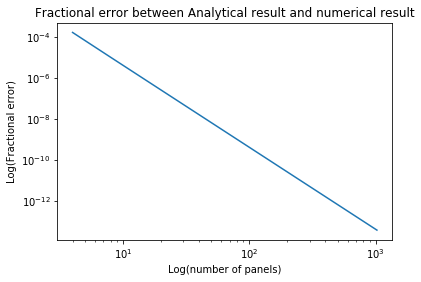

In [14]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

def result_numeric(x0,x1,h):
    result = []
    for i in h:
        result.append(integrate_numeric(x0,x1,i))
    return result

fractional_error = 1 - ((result_numeric(x0, x1, panel_counts))/(result_analytic))

plt.loglog(panel_counts, fractional_error)
plt.title("Fractional error between Analytical result and numerical result")
plt.xlabel("Log(number of panels)")
plt.ylabel("Log(Fractional error)")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels in general increases the accuracy of the numerical method. However, if the number of panels is too large, the accuracy begins to decrease slightly in the case of a function which is not smooth

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule is less accurate than simpson's rule, but increasing panel count increases accuracy with smooth functions and when there is no divergences. For a non-smooth function, the accuracy starts to decrease once the number of panels increases above around $10^6$